In [2]:
using LinearAlgebra, BenchmarkTools, Profile, GLMakie
using Statistics, Distributions
using LaTeXStrings
GLMakie.activate!(inline=true)
# set_theme!(theme_black())
# plotlyjs()

In [3]:
include("../src/FPsim.jl")
using .FPsim

#### 1D OU-process

In [3]:
sim_t = 500
sim_ensemble_n = 100000

coff = LangevinCoff(t->Diagonal([2.0]), t->(-0.5t))
ens = init_LangevinEnsemble(1, sim_t, 0.01, coff, :Delta, sim_ensemble_n)

LangevinEnsemble(1, 500, 0.01, 100000, [0.0 0.28494342218232 … -2.7010653229212953 -2.6037669927711202;;; 0.0 -0.21570489359787906 … 0.38414741585931667 -0.18997239176952685;;; 0.0 0.041947668551506404 … -0.9799858839305258 -0.9397029162736287;;; … ;;; 0.0 -0.048203548386937044 … 0.20802026688971303 0.3373881088527595;;; 0.0 -0.06513046698016882 … 0.1305572659409972 0.008968961601722267;;; 0.0 -0.01647855092548372 … -2.2953656124655084 -2.2432825972820747])

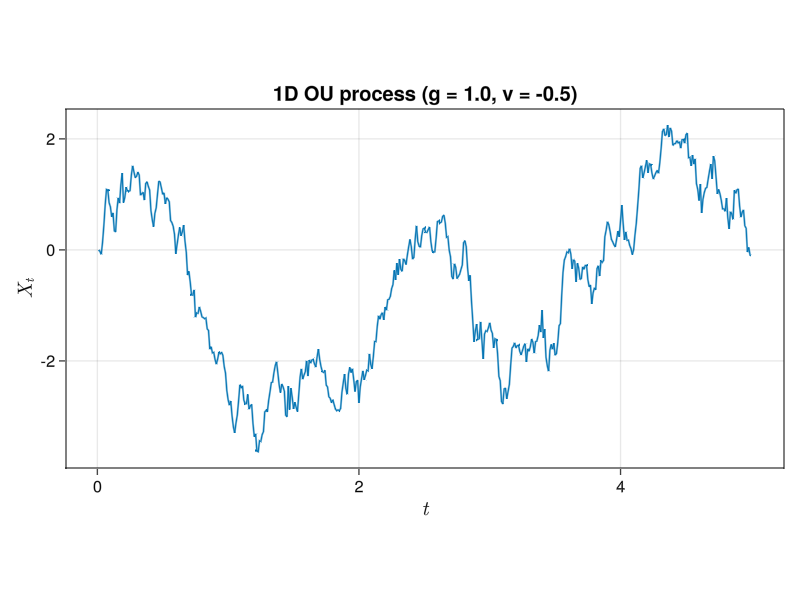

In [8]:
f = Figure(size = (500, 1000))
ax1 = Axis(f[1, 1], aspect = 2, title = "1D OU process (g = 1.0, v = -0.5)",
            xlabel = L"t", ylabel = L"X_t", xlabelsize = 20, ylabelsize = 20,
            titlesize = 20)

lines!(ax1, (1:sim_t).*ens.Δt, ens.paths[1, :, 1])

save("../res/OU1.png", f)

f

In [49]:
time = Observable(100)

ens_paths_x = @lift(ens.paths[1, $time, :])
title = @lift("t = " * string(round($time*ens.Δt, digits = 2)))


fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = title, xlabel = L"x", ylabel = L"P(x)")

hist!(ax1, ens_paths_x, bins = -7.0:0.01:7.0, normalization = :pdf)

framerate = 10
timestamps = 1:500

record(fig, "./res/OU-hist.mp4", timestamps; framerate = framerate) do t
    time[] = t
end

"./res/OU-hist.mp4"

MESA-LOADER: failed to retrieve device information
MESA-LOADER: failed to open nvidia-drm: /usr/lib/dri/nvidia-drm_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/dri, suffix _dri)
failed to load driver: nvidia-drm


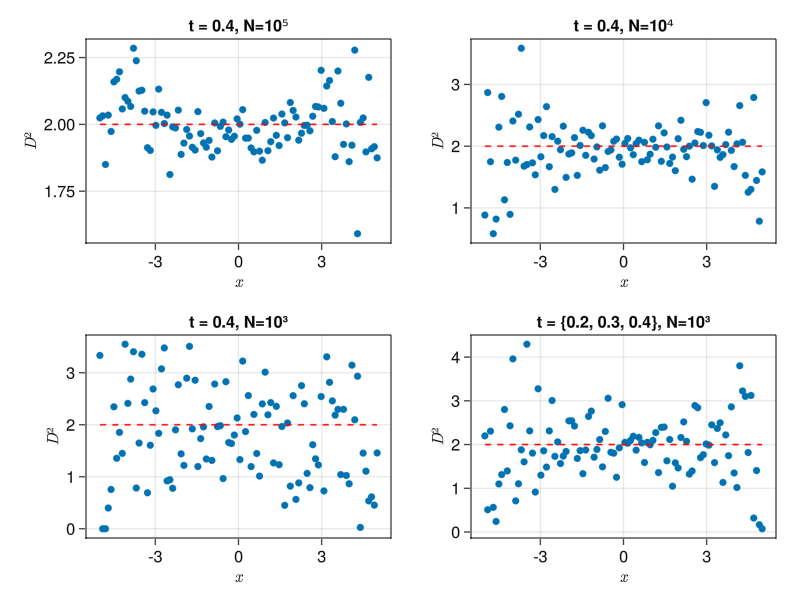

In [4]:
fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D¹")
ax2 = Axis(fig[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D¹")
ax3 = Axis(fig[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D¹")
ax4 = Axis(fig[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D¹")

fig_alt =  Figure(size = [1000, 1000])
ax_alt1 = Axis(fig_alt[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D²")
ax_alt2 = Axis(fig_alt[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D²")
ax_alt3 = Axis(fig_alt[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D²")
ax_alt4 = Axis(fig_alt[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D²")



g = Grid(1, [-5.0], 0.1, 100)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax1, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax1, LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
scatter!(ax_alt1, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt1, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax2, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax2, LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
scatter!(ax_alt2, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt2, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax3, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax3, LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
scatter!(ax_alt3, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt3, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 200:100:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax4, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax4, LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
scatter!(ax_alt4, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt4, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


save("../res/OU-ReD1.png", fig)
save("../res/OU-ReD2.png", fig_alt)


fig_alt

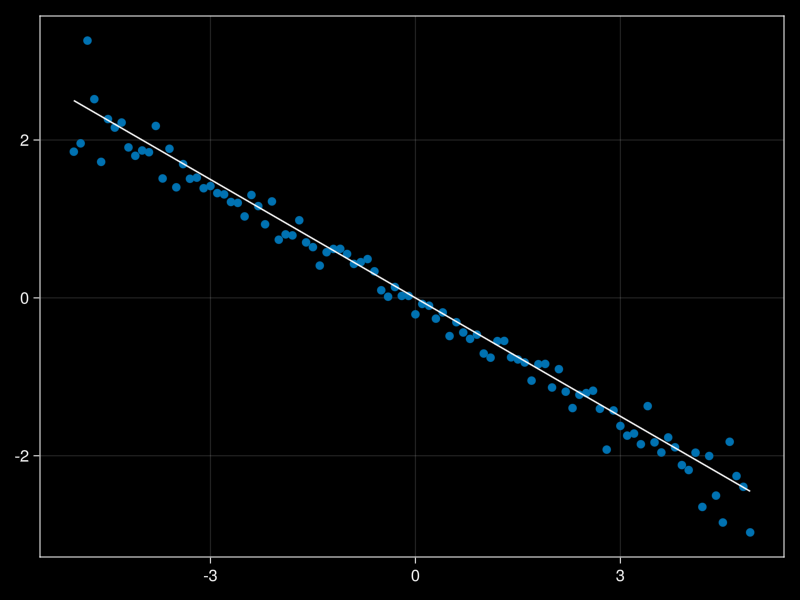

In [7]:
f, ax = GLMakie.scatter(-5:0.1:4.9, estimated_D1)
lines!(-5:0.1:4.9, x->-0.5*x, color = :White)

f

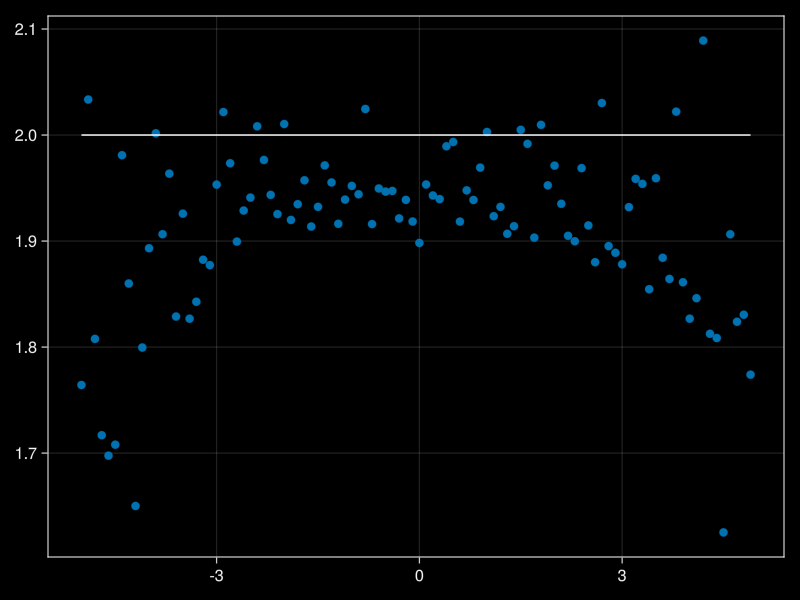

In [9]:
f, ax = GLMakie.scatter(-5:0.1:4.9, estimated_D2)
lines!(-5:0.1:4.9, x->2.0, color = :White)

f

#### 1D Double well

In [5]:
sim_t = 500
sim_ensemble_n = 100000

init_dist = () -> rand(Uniform(-1, 1), 1)
coff = LangevinCoff(t->Diagonal([2.0]), t->4*t-0.72(t't)*t)
ens = init_LangevinEnsemble(1, sim_t, 0.01, coff, init_dist, sim_ensemble_n)

LangevinEnsemble(1, 500, 0.01, 100000, [0.5195620446023188 0.7104103018105684 … 2.3688222159664907 2.177667537150152;;; -0.6851151830802666 -0.8350169645662375 … -0.3433689971580249 -0.18461793694235532;;; 0.7291198381835868 0.5974393434620209 … 1.6054033213440648 1.7492215573493783;;; … ;;; -0.10828290433602605 -0.03970180512425531 … 1.380379900014487 1.624550584592553;;; -0.4048545306541407 -0.6972003684680818 … -2.4989089086334237 -2.4128730414777033;;; -0.8194256047334754 -1.0801776506271945 … -2.7207572290489637 -2.686428613680969])

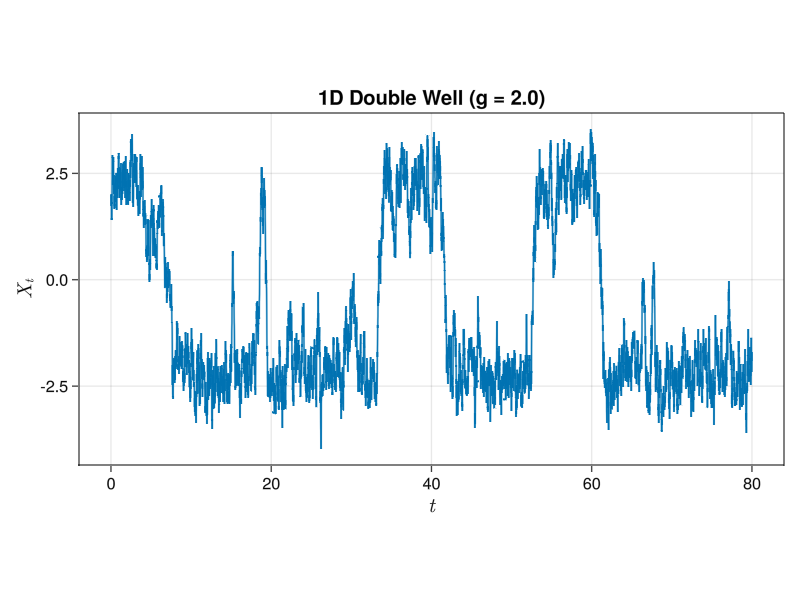

In [17]:
long_path = init_LangevinPath(1, 8000, 0.01, coff, [2.0])

f = Figure(size = (500, 1000))
ax1 = Axis(f[1, 1], aspect = 2, title = "1D Double Well (g = 2.0)",
            xlabel = L"t", ylabel = L"X_t", xlabelsize = 20, ylabelsize = 20,
            titlesize = 20)

lines!(ax1, (1:8000).*long_path.Δt, long_path.path[1, :])

save("../res/MH1.png", f)
f

In [55]:
time = Observable(200)

ens_paths_x = @lift(ens.paths[1, $time, :])
title = @lift("t = " * string(round($time*ens.Δt, digits = 2)))


fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = title, xlabel = L"x", ylabel = L"P(x)")

pot(t) = (-2*t^2 + 0.18*t^4 + 6) / 50
lines!(ax1, -7.0:0.01:7.0, pot, label = "Potential (scaled)", linestyle = :dash,
        color = :Red)
ylims!(ax1, 0, 0.4)
axislegend(ax1)

hist!(ax1, ens_paths_x, bins = -7.0:0.01:7.0, normalization = :pdf)

framerate = 10
timestamps = 1:500

record(fig, "./res/MH-hist.mp4", timestamps; framerate = framerate) do t
    time[] = t
end

"./res/MH-hist.mp4"

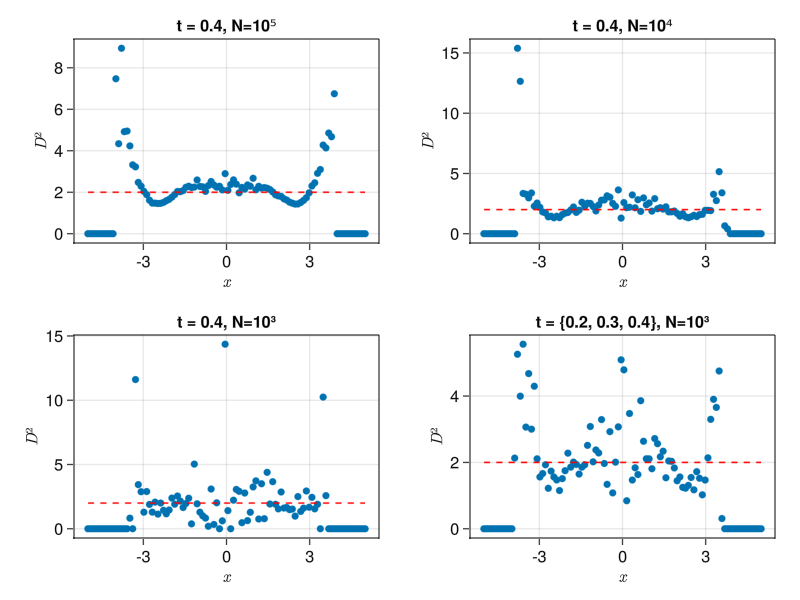

In [6]:
fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D¹")
ax2 = Axis(fig[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D¹")
ax3 = Axis(fig[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D¹")
ax4 = Axis(fig[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D¹")

fig_alt =  Figure(size = [1000, 1000])
ax_alt1 = Axis(fig_alt[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D²")
ax_alt2 = Axis(fig_alt[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D²")
ax_alt3 = Axis(fig_alt[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D²")
ax_alt4 = Axis(fig_alt[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D²")

ylims!.([ax1, ax2, ax3, ax4], -15, 15)


g = Grid(1, [-5.0], 0.1, 100)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax1, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax1, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt1, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt1, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax2, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax2, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt2, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt2, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax3, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax3, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt3, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt3, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 200:100:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax4, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax4, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt4, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt4, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


save("../res/MH-ReD1.png", fig)
save("../res/MH-ReD2.png", fig_alt)


fig_alt

#### 1D Anderson - Kubo

In [7]:
sim_t = 500
sim_ensemble_n = 100000

init_dist = () -> rand(Uniform(-3, 3), 1)
coff = LangevinCoff(t->Diagonal([t[1]]), t->(0.0)*t)
ens = init_LangevinEnsemble(1, sim_t, 0.01, coff, init_dist, sim_ensemble_n)

LangevinEnsemble(1, 500, 0.01, 100000, [0.11177885800585496 0.09559574309144264 … 0.009106743544529824 0.008424151138024975;;; 0.9592556719763001 0.893307178896876 … 0.40422502749414035 0.4135125411017891;;; 0.45649048049069485 0.38373143433168705 … 0.005022865056254414 0.005049308302903326;;; … ;;; -2.7535549648819297 -2.924885098221216 … -0.08085212231778627 -0.07830882318593115;;; -1.138091366913329 -1.238977986217067 … -0.13806325804692798 -0.13111335215742617;;; -2.7709219864381334 -2.940349087456712 … -65.70724401458557 -63.39361969030074])

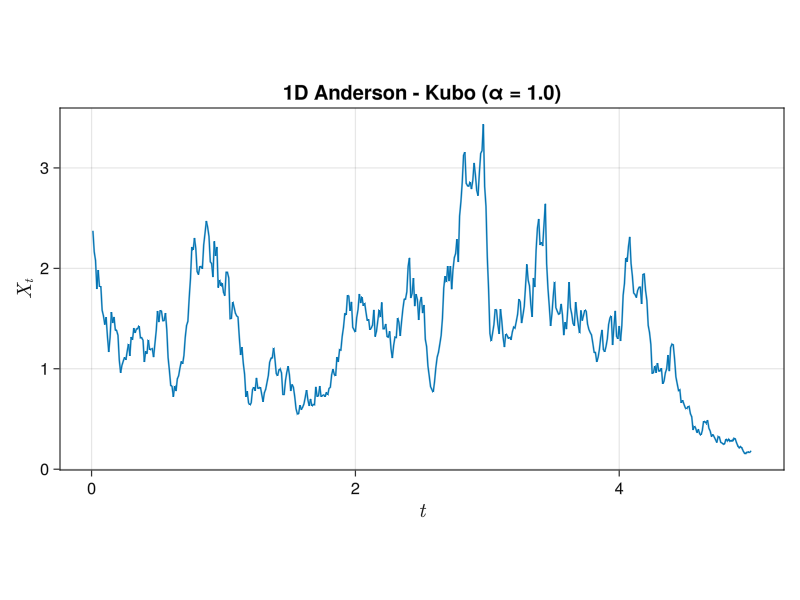

In [80]:
f = Figure(size = (500, 1000))
ax1 = Axis(f[1, 1], aspect = 2, title = "1D Anderson - Kubo (α = 1.0)",
            xlabel = L"t", ylabel = L"X_t", xlabelsize = 20, ylabelsize = 20,
            titlesize = 20)

lines!(ax1, (1:sim_t).*ens.Δt, ens.paths[1, :, 10])

save("./res/AK1.png", f)

f

In [32]:
time = Observable(200)

ens_paths_x = @lift(ens.paths[1, $time, :])
title = @lift("t = " * string(round($time*ens.Δt, digits = 2)))


fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = title, xlabel = L"x", ylabel = L"P(x)")


hist!(ax1, ens_paths_x, bins = -7.0:0.01:7.0, normalization = :pdf)

framerate = 10
timestamps = 1:500

record(fig, "../res/AK-hist.mp4", timestamps; framerate = framerate) do t
    time[] = t
end

"../res/AK-hist.mp4"

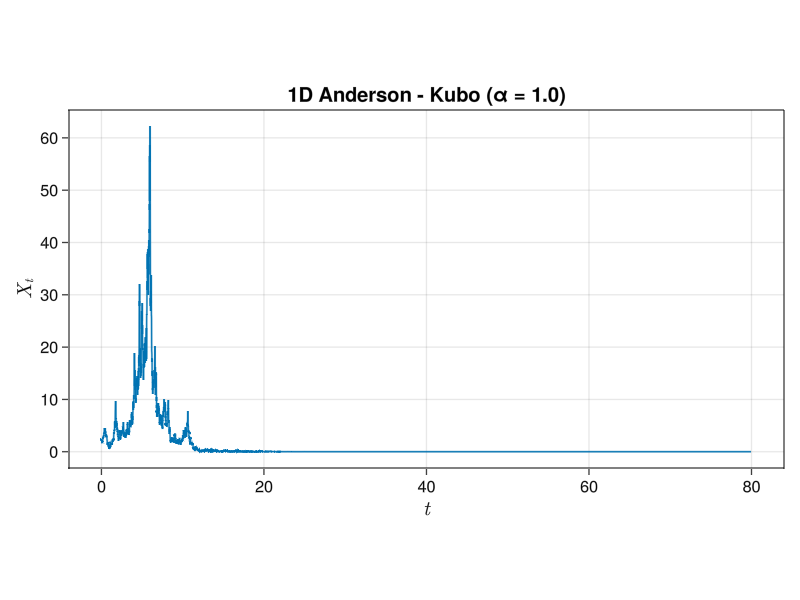

In [44]:
long_path = init_LangevinPath(1, 8000, 0.01, coff, [2.0])

f = Figure(size = (500, 1000))
ax1 = Axis(f[1, 1], aspect = 2, title = "1D Anderson - Kubo (α = 1.0)",
            xlabel = L"t", ylabel = L"X_t", xlabelsize = 20, ylabelsize = 20,
            titlesize = 20)

lines!(ax1, (1:8000).*long_path.Δt, long_path.path[1, :])

save("../res/AK1-long.png", f)

f

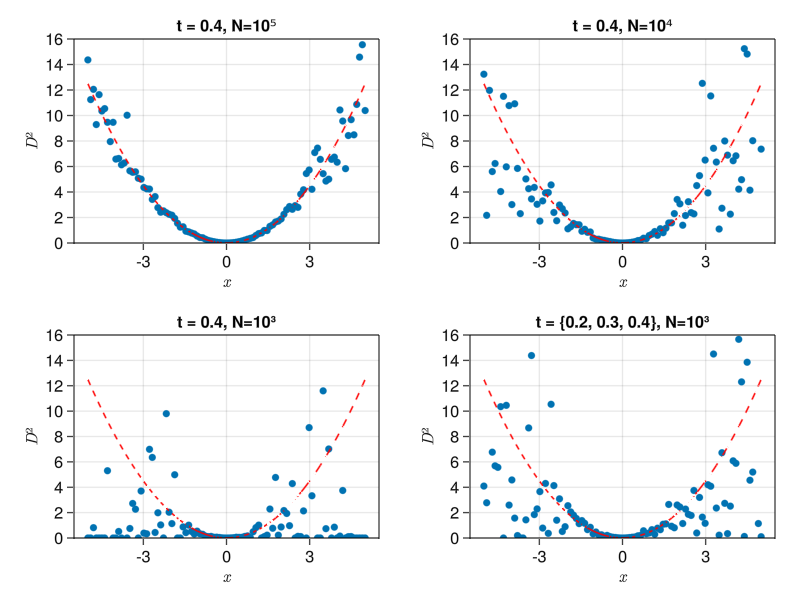

In [8]:
fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D¹")
ax2 = Axis(fig[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D¹")
ax3 = Axis(fig[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D¹")
ax4 = Axis(fig[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D¹")

fig_alt =  Figure(size = [1000, 1000])
ax_alt1 = Axis(fig_alt[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D²")
ax_alt2 = Axis(fig_alt[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D²")
ax_alt3 = Axis(fig_alt[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D²")
ax_alt4 = Axis(fig_alt[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D²")

ylims!.([ax_alt1, ax_alt2, ax_alt3, ax_alt4], 0, 16)


g = Grid(1, [-5.0], 0.1, 100)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax1, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax1, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt1, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt1, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax2, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax2, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt2, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt2, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax3, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax3, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt3, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt3, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 200:100:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax4, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax4, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt4, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt4, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


save("../res/AK-ReD1.png", fig)
save("../res/AK-ReD2.png", fig_alt)


fig_alt

#### 1D Black - Scholes

In [9]:
sim_t = 500
sim_ensemble_n = 100000

init_dist = () -> rand(Uniform(-3, 3), 1)
coff = LangevinCoff(t->Diagonal([t[1]]), t->(0.75)*t)
ens = init_LangevinEnsemble(1, sim_t, 0.01, coff, init_dist, sim_ensemble_n)

LangevinEnsemble(1, 500, 0.01, 100000, [-2.4310352418918297 -2.594528393264726 … -7.835720475255111 -7.4960054502557805;;; -0.08691501512456057 -0.07226258726404226 … -4.368187994884745 -4.033411489566347;;; -1.1524008823803331 -1.1121607760731558 … -2.723499672687832 -2.596143722116939;;; … ;;; -1.4914635117811093 -1.5132889402264484 … -7.515666184827378 -8.178294079160835;;; -2.447196203174664 -2.3583935906686873 … -0.5569793463195883 -0.46787458357935596;;; 1.426034947574113 1.2945131614744965 … 3.511732482349223 3.271536359884547])

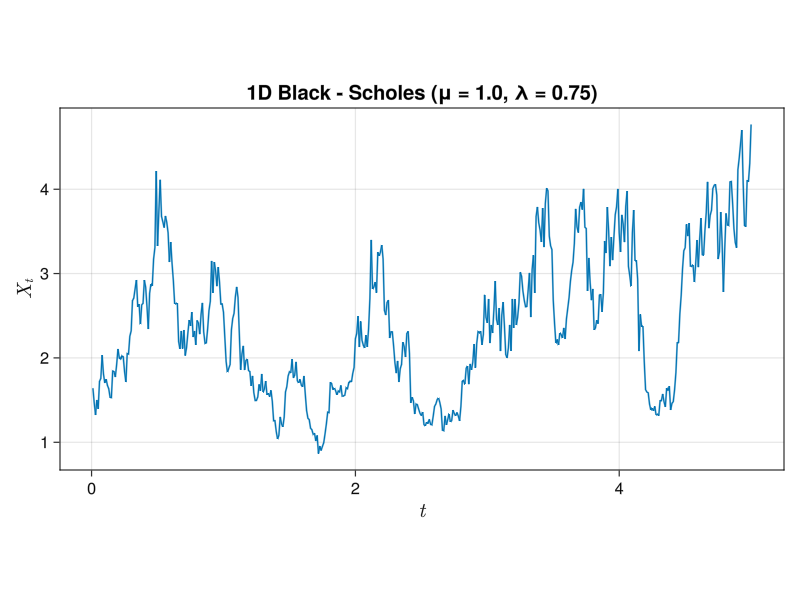

In [90]:
f = Figure(size = (500, 1000))
ax1 = Axis(f[1, 1], aspect = 2, title = "1D Black - Scholes (μ = 1.0, λ = 0.75)",
            xlabel = L"t", ylabel = L"X_t", xlabelsize = 20, ylabelsize = 20,
            titlesize = 20)

lines!(ax1, (1:sim_t).*ens.Δt, ens.paths[1, :, 10])

save("./res/BS1.png", f)

f

In [91]:
time = Observable(200)

ens_paths_x = @lift(ens.paths[1, $time, :])
title = @lift("t = " * string(round($time*ens.Δt, digits = 2)))


fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = title, xlabel = L"x", ylabel = L"P(x)")


hist!(ax1, ens_paths_x, bins = -7.0:0.01:7.0, normalization = :pdf)

framerate = 10
timestamps = 1:500

record(fig, "./res/BS-hist.mp4", timestamps; framerate = framerate) do t
    time[] = t
end

"./res/BS-hist.mp4"

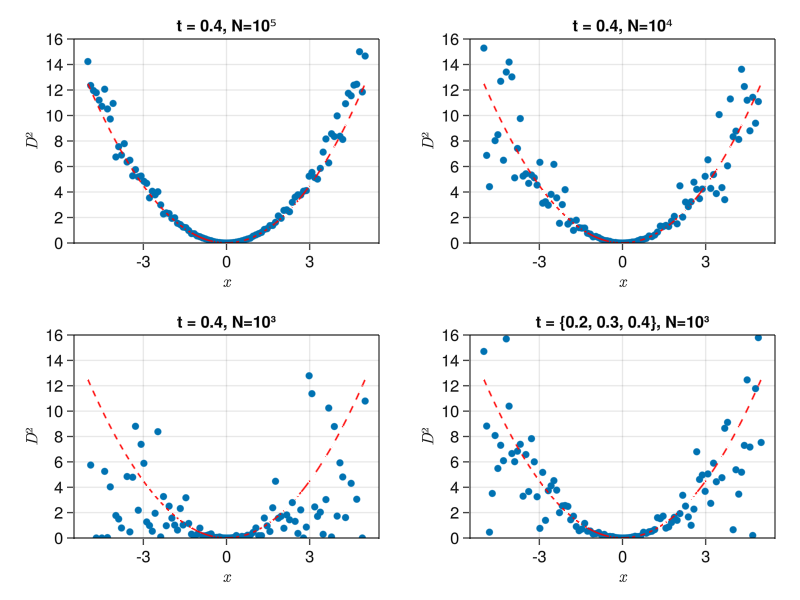

In [11]:
fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D¹")
ax2 = Axis(fig[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D¹")
ax3 = Axis(fig[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D¹")
ax4 = Axis(fig[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D¹")

fig_alt =  Figure(size = [1000, 1000])
ax_alt1 = Axis(fig_alt[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D²")
ax_alt2 = Axis(fig_alt[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D²")
ax_alt3 = Axis(fig_alt[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D²")
ax_alt4 = Axis(fig_alt[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D²")

ylims!.([ax_alt1, ax_alt2, ax_alt3, ax_alt4], 0, 16)


g = Grid(1, [-5.0], 0.1, 100)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax1, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax1, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt1, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt1, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax2, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax2, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt2, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt2, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax3, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax3, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt3, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt3, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 200:100:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax4, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax4, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt4, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt4, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


save("../res/BS-ReD1.png", fig)
save("../res/BS-ReD2.png", fig_alt)


fig_alt

#### 2D OU

In [3]:
sim_t = 500
sim_ensemble_n = 100000

coff = LangevinCoff(t->Diagonal([2.0, 2.0]), t->(-0.5*t))
ens = init_LangevinEnsemble(2, sim_t, 0.01, coff, :Delta, sim_ensemble_n)
;

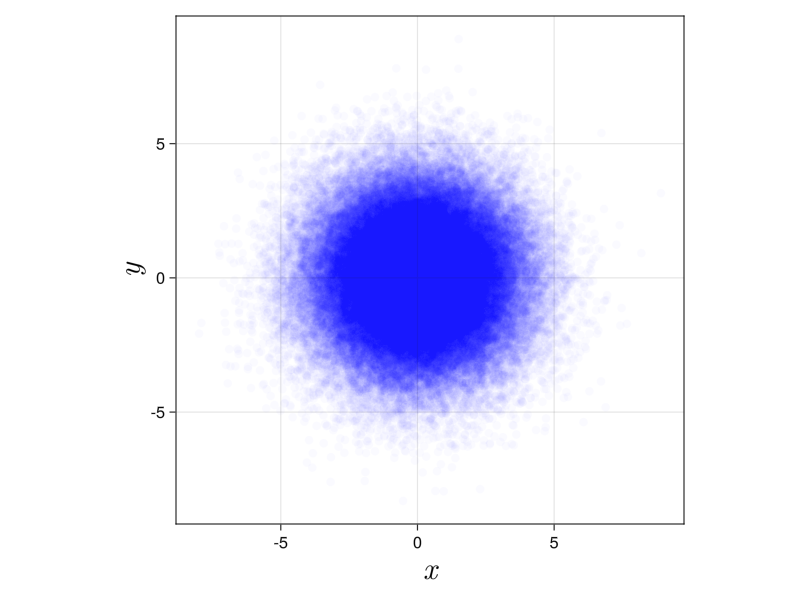

In [11]:
f = Figure(size = (1000, 1000))
ax = Axis(f[1, 1], aspect = 1, xlabel = L"x", ylabel = L"y", xlabelsize = 30, ylabelsize = 30)

GLMakie.scatter!(ax, ens.paths[1, 200, :], ens.paths[2, 200, :], color = (:Blue, 0.02))

f

In [16]:
time = Observable(1)

ani_paths_x = @lift(ens.paths[1, $time, :])
ani_paths_y = @lift(ens.paths[2, $time, :])


fig = Figure(size = (1000, 1000))
ax1 = Axis(fig[1, 1], aspect = 1, xlabel = L"x", ylabel = L"y", xlabelsize = 30, ylabelsize = 30
            , title = "2D OU Process")


scatter!(ax1, ani_paths_x, ani_paths_y, color = (:Blue, 0.2))
xlims!(ax1, [-7, 7])
ylims!(ax1, [-7, 7])

framerate = 30
timestamps = 1:sim_t

record(fig, "./res/OU-2D.mp4", timestamps; framerate = framerate) do t
    time[] = t
end

"./res/OU-2D.mp4"

In [27]:
g = Grid(2, [-5.0, -5.0], 0.1, 100)
estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)

sampling_range = 200:20:400

for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

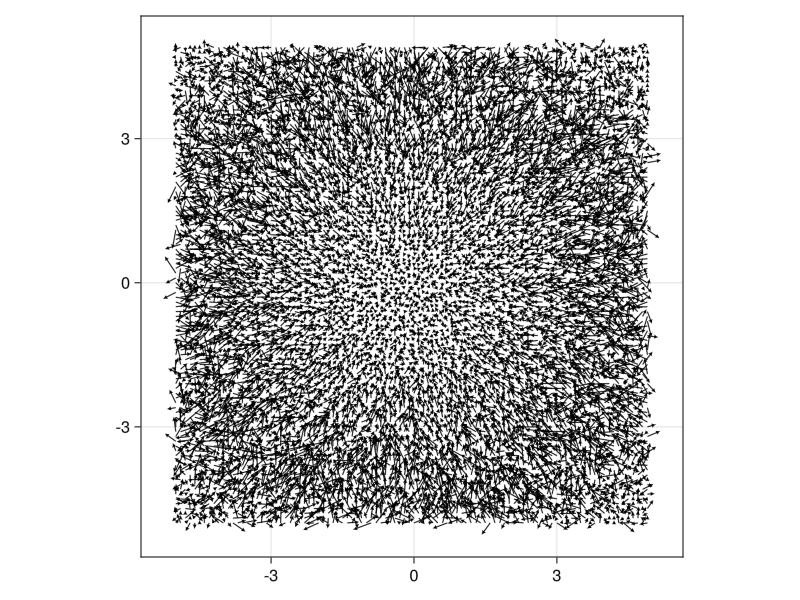

In [32]:
f = Figure(size = (1000, 1000))
ax = Axis(f[1, 1], aspect = 1)


arrows!(ax, -5.0:0.1:4.9, -5.0:0.1:4.9, estimated_D1[1, :, :],  estimated_D1[2, :, :],
        arrowsize = 5.0, lengthscale = 0.08)

f

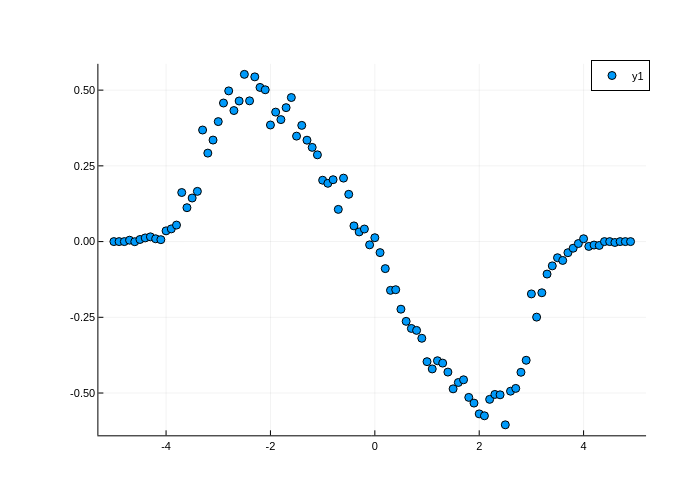

In [188]:
Plots.scatter(-5.0:0.1:4.9, mean.(eachslice(estimated_D1[2, :, :], dims = 2)))
# scatter(estimated_D1[1, :, 49])

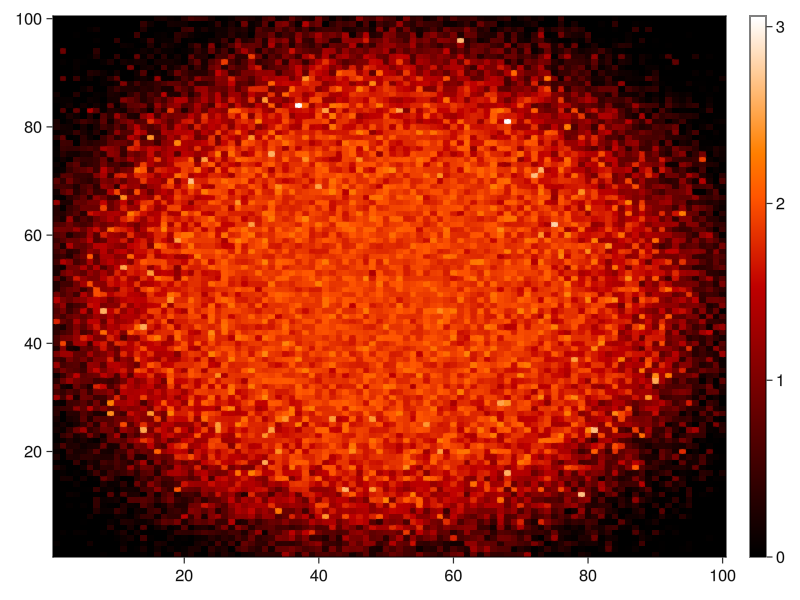

In [33]:
f = Figure(size = (1000, 1000))


ax, hm = heatmap(f[1,1], estimated_D2[1, 1, :, :], colormap = :gist_heat)
Colorbar(f[1, 2], hm)

f

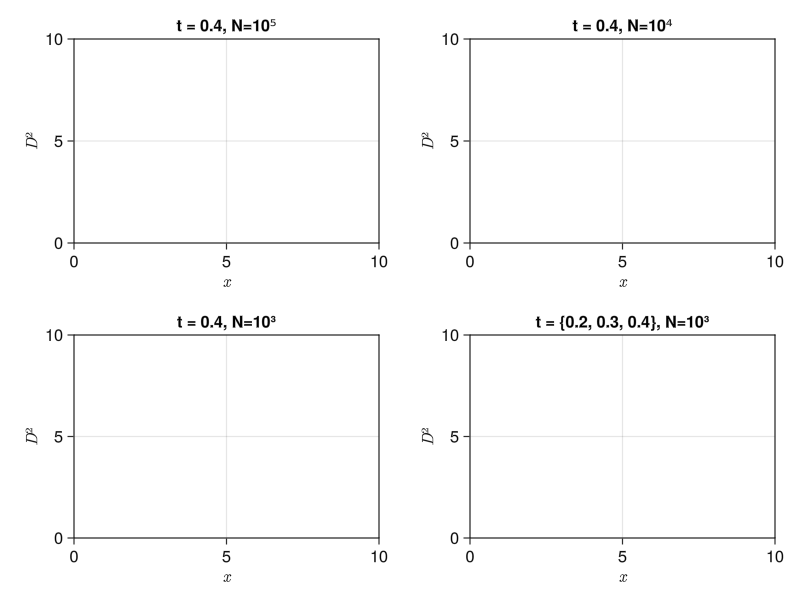

In [24]:
fig =  Figure(size = [4000, 4000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D¹")
ax2 = Axis(fig[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D¹")
ax3 = Axis(fig[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D¹")
ax4 = Axis(fig[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D¹")

fig_alt =  Figure(size = [1000, 1000])
ax_alt1 = Axis(fig_alt[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D²")
ax_alt2 = Axis(fig_alt[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D²")
ax_alt3 = Axis(fig_alt[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D²")
ax_alt4 = Axis(fig_alt[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D²")



g = Grid(2, [-5.0, -5.0], 0.1, 100)

estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

arrows!(ax1, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D1[1, :, :], estimated_D1[2, :, :],
        lengthscale = 0.01, arrowsize = 1)
# lines!(ax1, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
# heatmap!(ax_alt1, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
# lines!(ax_alt1, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)

estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

arrows!(ax2, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D1[1, :, :], estimated_D1[2, :, :],
        lengthscale = 0.01, arrowsize = 1)
# lines!(ax2, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
# heatmap!(ax_alt2, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
# lines!(ax_alt2, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

arrows!(ax3, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D1[1, :, :], estimated_D1[2, :, :],
        lengthscale = 0.01, arrowsize = 1)
# lines!(ax3, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
# heatmap!(ax_alt3, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
# lines!(ax_alt3, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)
sampling_range = 200:100:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

arrows!(ax4, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D1[1, :, :], estimated_D1[2, :, :],
        lengthscale = 0.01, arrowsize = 1)
# lines!(ax4, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
# heatmap!(ax_alt4, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
# lines!(ax_alt4, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


save("./res/OU-2-ReD1.png", fig)
save("./res/OU-2-ReD2.png", fig_alt)


fig_alt

#### 2D Mexican Hat

In [4]:
sim_t = 500
sim_ensemble_n = 100000

coff = LangevinCoff(t->Diagonal([1.0, 1.0]), t->2*t-0.36(t't)*t)
ens = init_LangevinEnsemble(2, sim_t, 0.01, coff, :Delta, sim_ensemble_n)
;

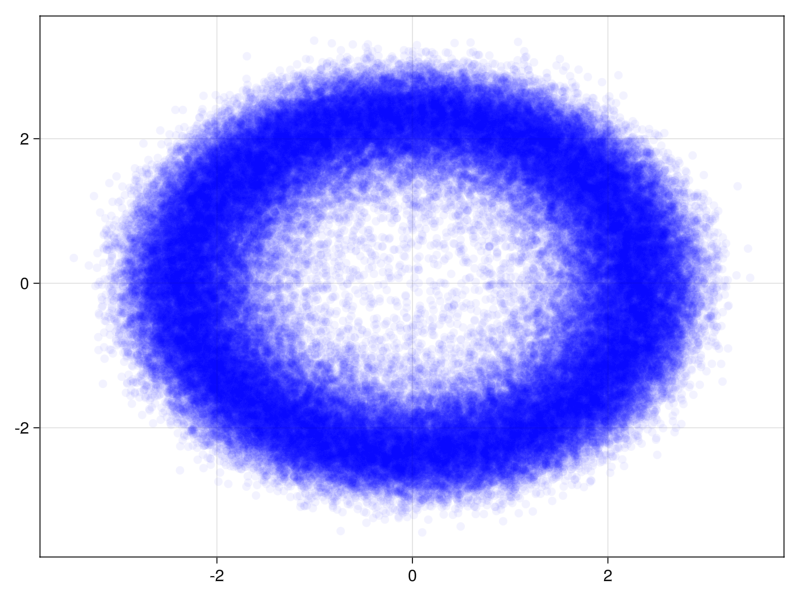

In [143]:
scatter(ens.paths[1, 200, :], ens.paths[2, 200, :], color = (:Blue, 0.05))

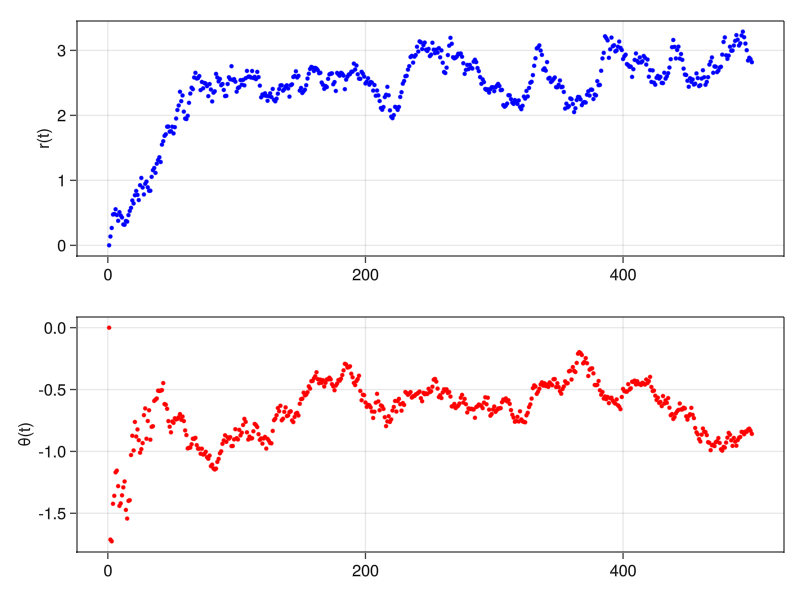

In [7]:
f = Figure(size = (1000, 1000))
ax1 = Axis(f[1, 1], aspect = 3, ylabel = "r(t)")
ax2 = Axis(f[2, 1], aspect = 3, ylabel = "θ(t)")

r_path = sqrt.(ens.paths[1, :, 5].^2 + ens.paths[2, :, 5].^2)
theta_path = atan.(ens.paths[2, :, 5], ens.paths[1, :, 5])

scatter!(ax1, 1:sim_t, r_path, color = :Blue, markersize = 6.0)
scatter!(ax2, 1:sim_t, theta_path, color = :Red, markersize = 6.0)

f

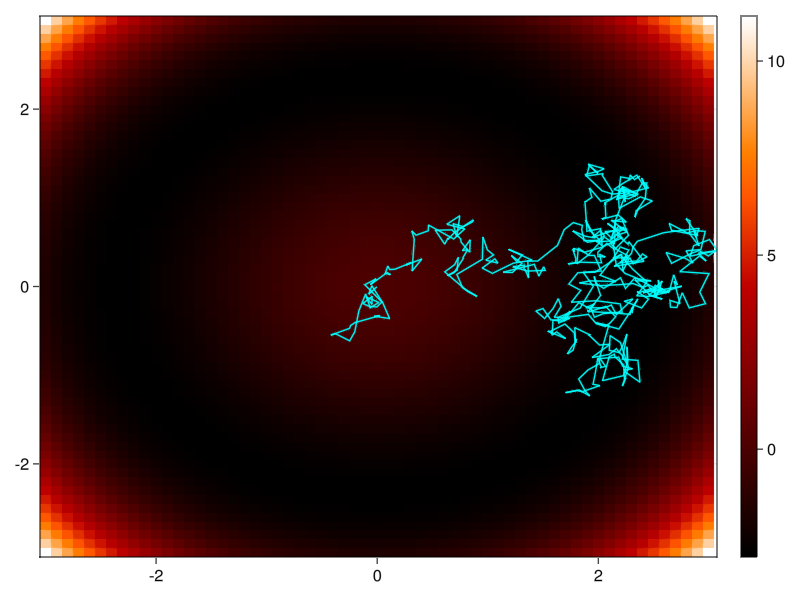

In [17]:
pot3(t) = 0.09*(t't)^2 - (t't)


f, ax, hm = heatmap(-3.0:0.1:3, -3.0:0.1:3, (x,y) -> pot3([x, y]),
                    colormap = :gist_heat)
Colorbar(f[:, end+1], hm)
lines!(ax, ens.paths[1, :, 20], ens.paths[2, :, 20], color = :cyan)
f

In [9]:
g = Grid(2, [-5.0, -5.0], 0.1, 100)
estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)

sampling_range = 100:50:400

for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 20)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

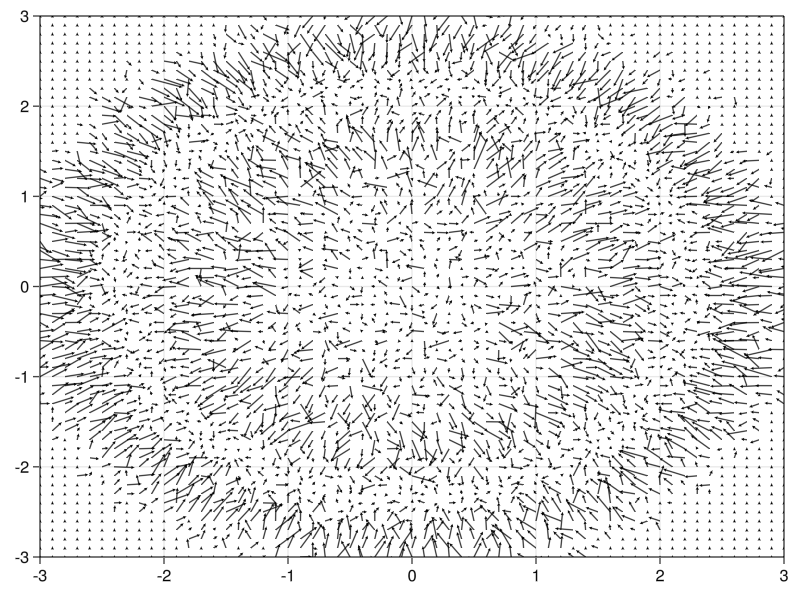

In [15]:
fig ,ax = arrows(-5.0:0.1:4.9, -5.0:0.1:4.9, estimated_D1[1, :, :],  estimated_D1[2, :, :],
        arrowsize = 5, lengthscale = 0.1)

xlims!(ax, [-3, 3])
ylims!(ax, [-3, 3])

fig

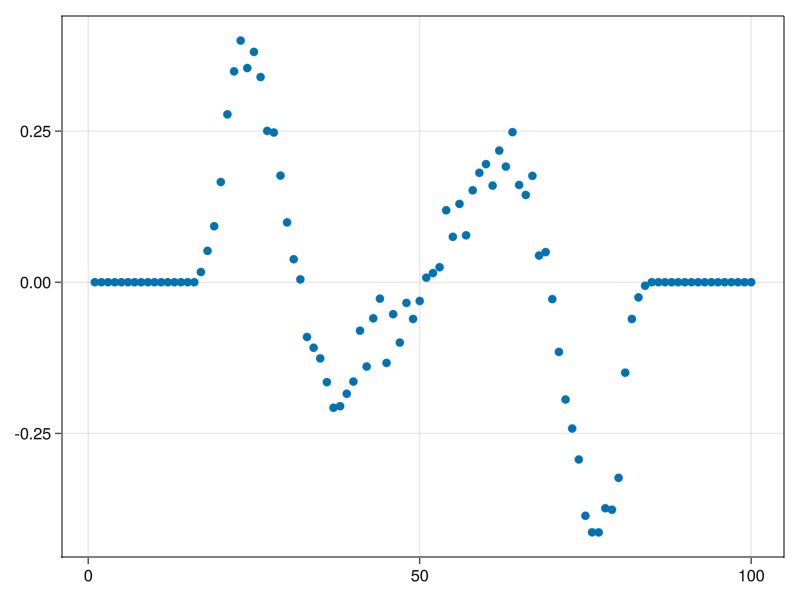

In [11]:
scatter(mean.(eachslice(estimated_D1[2, :, :], dims = 2)))
